# PROJECT : APES

In [1]:
%matplotlib inline
from Settings import *
from World import *
from Agent import *
from Obstacles import *
from Foods import *
import numpy as np
from time import time
np.random.seed(10)

In [2]:
Start = time()
#Add Pictures
Settings.SetBlockSize(20)
Settings.AddImage('Wall','Pics/wall.jpg')
Settings.AddImage('Food','Pics/food.jpg')
#Specify World Size
Settings.WorldSize=(11,11)

#Create Probabilities
obs = np.zeros(Settings.WorldSize)
ragnt = np.zeros(Settings.WorldSize)
gagnt = np.zeros(Settings.WorldSize)
food = np.zeros(Settings.WorldSize)
obs[3:8,5] = 1
ragnt[:,0] =1
gagnt[:,10]=1
food[:,4:7]=1
food[3:8,5] = 0

#Add Probabilities to Settings
Settings.AddProbabilityDistribution('Obs',obs)
Settings.AddProbabilityDistribution('ragnt',ragnt)
Settings.AddProbabilityDistribution('gagnt',gagnt)
Settings.AddProbabilityDistribution('food',food)

#Create World Elements
obs = Obstacles('Wall',Shape=np.array([[1],[1],[1],[1]]),PdstName='Obs')
ragnt = Agent(Fname='Pics/ragent.jpg',Power=3,VisionAngle=180,PdstName='ragnt')
gagnt = Agent(Fname='Pics/gagent.jpg',PdstName='gagnt',VisionAngle=180)
food = Foods('Food',PdstName='food')

game = World()
#Adding Agents in Order of Following the action
game.AddAgents([ragnt,gagnt])
game.AddObstacles([obs])
game.AddFoods([food])#,Foods('Food',PdstName='food')])
Start = time()-Start
print Start

0.0958669185638


0.0149230957031


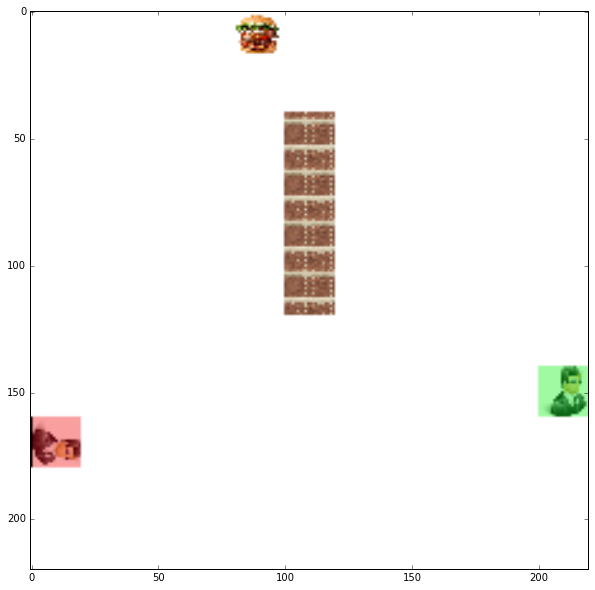

In [3]:
Start = time()
game.GenerateWorld()
Start = time()-Start
print Start
plt.figure(figsize=Settings.FigureSize)
plt.imshow(game.BuildImage())

In [4]:
rimages = []
tt = []
for i in range (2):
    #ragnt.RandomAction(MRA=3)
    gagnt.RandomAction(MRA=3)
    #print len(ragnt.NextAction),ragnt.CurrentReward,len(gagnt.NextAction),gagnt.CurrentReward
    Start = time()
    game.Step()
    ragnt.DetectAndAstar()
    tt.append(time()-Start)
    #t = np.concatenate([game.AgentViewPoint(ragnt.ID),game.AgentViewPoint(gagnt.ID)],axis=1)
    #rimages.append(t)
    rimages.append(game.BuildImage())
    #print ragnt.NextAction,ragnt.CurrentReward
    #print gagnt.NextAction,gagnt.CurrentReward
#Save Video
#Settings.ani_frame(rimages=rimages,fps=5)

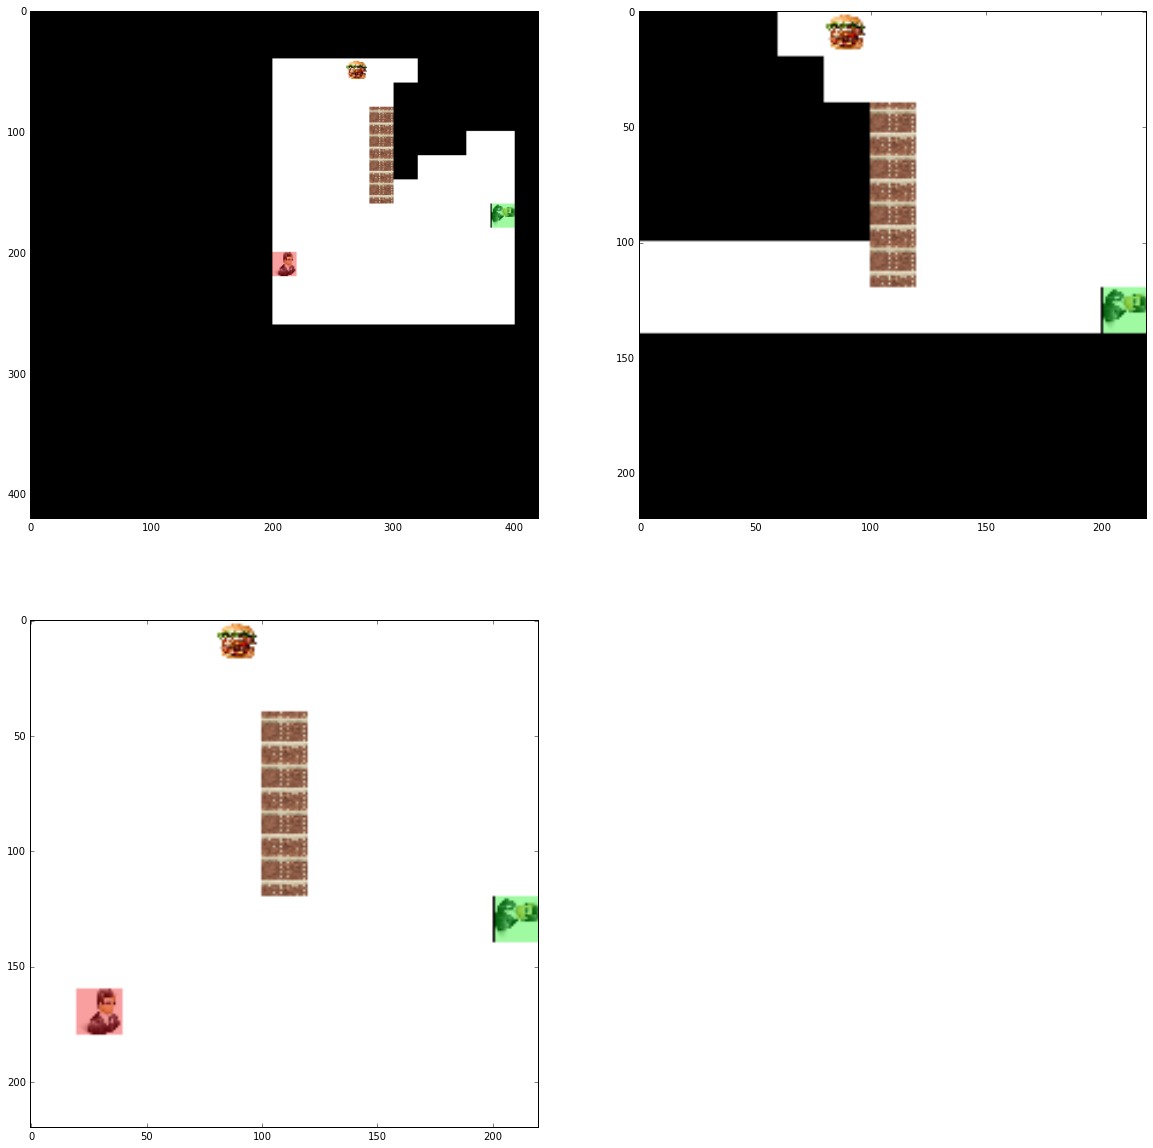

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(game.AgentViewPoint(1001,EgoCentric=True))
plt.subplot(2,2,2)
plt.imshow(game.AgentViewPoint(1002))
plt.subplot(2,2,3)
plt.imshow(game.BuildImage())

ani_frame()

In [6]:
print game.Terminated,game.AfterEndSteps,game.AES

[False] [0] 0
